In [2]:
from sklearn import linear_model
import pandas as pd
import pandas_profiling
from sklearn.metrics import accuracy_score 
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import joblib
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [4]:
dataframe1 = pd.read_csv("/home/apprenant/simplon_project/League_of_Winner/data/dataclear.csv")
dataframe2 = pd.read_csv("/home/apprenant/simplon_project/League_of_Winner/data/data.csv")
dataframe = pd.concat([dataframe1, dataframe2])
# add 2 new columns in the dataframe
dataframe['blue_kill'] = dataframe["kill_1"] + dataframe["kill_2"] + dataframe["kill_3"] + dataframe["kill_4"] + dataframe["kill_5"]
dataframe['red_kill'] = dataframe["kill_6"] + dataframe["kill_7"] + dataframe["kill_8"] + dataframe["kill_9"] + dataframe["kill_10"]
print("Le fichier a " + str(dataframe.shape[0]) + " lignes et " + str(dataframe.shape[1]) + " colonnes")

Le fichier a 421467 lignes et 176 colonnes


In [5]:
dataframe

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,sbireskill_7,jungsbirekill_7,sbireskill_8,jungsbirekill_8,sbireskill_9,jungsbirekill_9,sbireskill_10,jungsbirekill_10,blue_kill,red_kill
0,0,5350461408,0,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,5350461408,1,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,5350461408,2,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,3,5350461408,3,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4,5350461408,4,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141296,26,5376359606,26,Red,0,0,1,0,0,1,...,10.0,116.0,185.0,5.0,201.0,24.0,20.0,0.0,32,43
141297,27,5376359606,27,Red,0,0,1,0,0,1,...,12.0,124.0,186.0,9.0,205.0,32.0,21.0,0.0,35,45
141298,28,5376359606,28,Red,0,0,1,0,0,1,...,12.0,124.0,186.0,9.0,211.0,32.0,21.0,0.0,38,49
141299,29,5376359606,29,Red,0,0,1,0,0,1,...,12.0,124.0,191.0,9.0,214.0,32.0,22.0,0.0,39,55


In [6]:
df_train = dataframe.iloc[0:252876,:]
df_train

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,sbireskill_7,jungsbirekill_7,sbireskill_8,jungsbirekill_8,sbireskill_9,jungsbirekill_9,sbireskill_10,jungsbirekill_10,blue_kill,red_kill
0,0,5350461408,0,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,5350461408,1,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2,2,5350461408,2,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,3,5350461408,3,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,4,5350461408,4,Red,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252871,19,5340205573,19,Blue,0,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,31
252872,20,5340205573,20,Blue,0,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,33
252873,21,5340205573,21,Blue,0,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,37
252874,22,5340205573,22,Blue,0,0,0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,41


In [7]:
df_valid = dataframe.iloc[252876:337156,:]
df_valid

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,sbireskill_7,jungsbirekill_7,sbireskill_8,jungsbirekill_8,sbireskill_9,jungsbirekill_9,sbireskill_10,jungsbirekill_10,blue_kill,red_kill
252876,0,5385449771,0,Blue,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
252877,1,5385449771,1,Blue,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
252878,2,5385449771,2,Blue,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
252879,3,5385449771,3,Blue,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
252880,4,5385449771,4,Blue,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56985,26,5398914225,26,Red,0,0,0,0,0,0,...,16.0,140.0,177.0,4.0,149.0,4.0,8.0,4.0,33,38
56986,27,5398914225,27,Red,0,0,0,0,0,0,...,16.0,140.0,185.0,4.0,151.0,4.0,8.0,4.0,35,40
56987,28,5398914225,28,Red,0,0,0,0,0,0,...,17.0,140.0,205.0,4.0,157.0,4.0,8.0,4.0,36,45
56988,29,5398914225,29,Red,0,0,0,0,0,0,...,22.0,144.0,207.0,4.0,158.0,8.0,10.0,4.0,36,48


In [8]:
df_test = dataframe.iloc[337156:421467,:]
df_test

,Unnamed: 0,match_ID,timeline,who_win,blue_kill_nashor,blue_kill_herald,blue_kill_fire_drake,blue_kill_air_drake,blue_kill_water_drake,blue_kill_earth_drake,...,sbireskill_7,jungsbirekill_7,sbireskill_8,jungsbirekill_8,sbireskill_9,jungsbirekill_9,sbireskill_10,jungsbirekill_10,blue_kill,red_kill
56990,0,5341075862,0,Blue,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
56991,1,5341075862,1,Blue,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
56992,2,5341075862,2,Blue,0,0,0,0,0,0,...,0.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0,0
56993,3,5341075862,3,Blue,0,0,0,0,0,0,...,0.0,16.0,14.0,0.0,13.0,0.0,0.0,0.0,0,0
56994,4,5341075862,4,Blue,0,0,0,0,0,0,...,0.0,28.0,25.0,0.0,21.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141296,26,5376359606,26,Red,0,0,1,0,0,1,...,10.0,116.0,185.0,5.0,201.0,24.0,20.0,0.0,32,43
141297,27,5376359606,27,Red,0,0,1,0,0,1,...,12.0,124.0,186.0,9.0,205.0,32.0,21.0,0.0,35,45
141298,28,5376359606,28,Red,0,0,1,0,0,1,...,12.0,124.0,186.0,9.0,211.0,32.0,21.0,0.0,38,49
141299,29,5376359606,29,Red,0,0,1,0,0,1,...,12.0,124.0,191.0,9.0,214.0,32.0,22.0,0.0,39,55


In [9]:
list_of_variable = ['timeline', 'blue_destr_tower', 'red_destr_tower', 'blue_gold', 'red_gold', 'kill_1', 'death_1', 'assist_1', 'kill_2', 'death_2', 'assist_2', 'kill_3', 'death_3', 'assist_3', 'kill_4', 'death_4', 'assist_4', 'kill_5', 'death_5', 'assist_5',
'kill_6', 'death_6', 'assist_6', 'kill_7', 'death_7', 'assist_7', 'kill_8', 'death_8', 'assist_8', 'kill_9', 'death_9', 'assist_9', 'kill_10', 'death_10', 'assist_10']
X_train = df_train[list_of_variable]
X_test = df_test[list_of_variable]
X_valid = df_valid[list_of_variable]
y_valid = df_valid['who_win']
y_train = df_train['who_win']
y_test = df_test['who_win']

### La variable cible ayant pour type str (deux valeurs possibles) on la transforme en binaire a l'aide de la fonction de pandas get_dummies

In [10]:
y_train = pd.get_dummies(y_train)
y_valid = pd.get_dummies(y_valid)
y_test = pd.get_dummies(y_test)

## Regression Linéaire simple 

In [11]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = reg.predict(X_test)
y_pred

array([[0.50141435, 0.49858565],
       [0.49808437, 0.50191563],
       [0.49503969, 0.50496031],
       ...,
       [0.26856291, 0.73143709],
       [0.16671782, 0.83328218],
       [0.06803192, 0.93196808]])

In [13]:
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

In [14]:
y_test['Blue'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [15]:
accuracy_score(y_test['Blue'].values, y_pred)

0.7104648266536988

In [18]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_simple' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_simple']

## Régression Linéaire avec Ridge

In [19]:
reg1 = linear_model.Ridge()
reg1.fit(X_train, y_train)

Ridge()

In [20]:
y_pred1 = reg1.predict(X_test)
y_pred1

array([[0.50141434, 0.49858566],
       [0.49808435, 0.50191565],
       [0.49503967, 0.50496033],
       ...,
       [0.26856285, 0.73143715],
       [0.16671766, 0.83328234],
       [0.06803181, 0.93196819]])

In [21]:
y_pred1 = [1 if x[0] > 0.5 else 0 for x in y_pred1]

In [22]:
y_test['Blue'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [23]:
accuracy_score(y_test['Blue'].values, y_pred1)

0.7104648266536988

In [24]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_ridge' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_ridge']

## Régression Linéaire avec Lasso

In [25]:
reg2 = linear_model.Lasso(alpha = 280)
reg2.fit(X_train, y_train)

Lasso(alpha=280)

In [26]:
y_pred2 = reg2.predict(X_test)
y_pred2

array([[0.49568601, 0.50431399],
       [0.49568601, 0.50431399],
       [0.49517717, 0.50482283],
       ...,
       [0.43968517, 0.56031483],
       [0.40594478, 0.59405522],
       [0.38665684, 0.61334316]])

In [27]:
y_pred2 = [1 if x[0] > 0.5 else 0 for x in y_pred2]

In [28]:
y_test['Blue'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [29]:
accuracy_score(y_test['Blue'].values, y_pred2)

0.7189571941976729

In [30]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_lasso' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_lineaire_lasso']

In [31]:
y_train


,Blue,Red
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
252871,1,0
252872,1,0
252873,1,0
252874,1,0


## Régression Logistique

In [33]:
reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train['Red'])

LogisticRegression()

In [34]:
y_pred3 = reg.predict(X_test)
y_pred3

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [36]:
accuracy_score(y_test['Red'].values, y_pred3)

0.7078910225237514

In [37]:
joblib.dump(reg, '/home/apprenant/simplon_project/League_of_Winner/notebook/regression_logistique' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/regression_logistique']

## Xgboost

In [38]:
X_train = df_train[list_of_variable]
X_test = df_test[list_of_variable]
y = df_train['who_win']

In [39]:
param_dist = {'objective':'binary:logistic', 'n_estimators':280}
boost = XGBClassifier(**param_dist)
boost.fit(X_train, y)
p_boost = boost.predict(X_train)
print ("précision -->", round(boost.score(X_train, y) *100,2), "%")

[09:15:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
précision --> 82.18 %


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

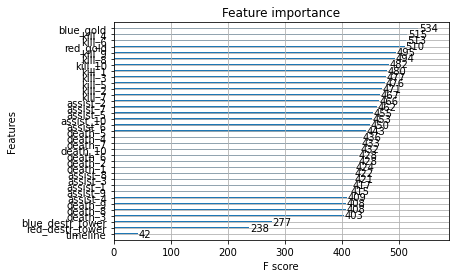

In [40]:
xgb.plot_importance(boost)

In [41]:
joblib.dump(boost, '/home/apprenant/simplon_project/League_of_Winner/notebook/xgboost' )

['/home/apprenant/simplon_project/League_of_Winner/notebook/xgboost']

## Random Forest Regressor

In [82]:
regr = RandomForestRegressor(n_estimators = 100, random_state = 2020)
regr.fit(X_train, y_train)
y_pred4 = regr.predict(X_test)

In [88]:
print ("précision -->", round(regr.score(X_test, y_pred4) *100,2), "%")

précision --> 100.0 %
